# Cleaing Profits Data

In [1]:
import pandas as pd
import missingno as mn

In [2]:
# store ID's and territory
# taken from a previous project
id_territory = {
    "001000026": "EB",
    "001000438": "EB",
    "001000608": "EB",
    "001000600": "EB",
    "001000685": "EB",
    "001000729": "EB",
    "001000637": "EB",
    "001000202": "EB",
    "001003102": "EB",
    "001000768": "EB",
    "001000429": "EB",
    "001000435": "EB",
    "001000492": "EB",
    "001000372": "MN",
    "001000151": "MN",
    "001000324": "MN",
    "001000275": "MN",
    "001000325": "MN",
    "001000373": "MN",
    "001000339": "MN",
    "001000042": "MN",
    "001000393": "MN",
    "001000143": "MN",
    "001000147": "MR",
    "001000148": "MR",
    "001000088": "MR",
    "001000029": "MR",
    "001000903": "MR",
    "001000108": "MR",
    "001000191": "MR",
    "001001011": "MR",
    "001000641": "MR",
    "001006175": "MR",
    "001000082": "MR",
    "001000334": "MR",
    "001000265": "MR",
    "001000643": "MR",
    "001000278": "MR",
    "001001241": "MR",
    "001006209": "MR",
    "001006219": "MR",
    "001000054": "MR",
    "001000028": "MR",
    "001000225": "MR",
    "001000343": "MR",
    "001014154": "MR",
    "001000771": "MR",
    "001000366": "MR",
    "001006206": "MR",
    "001000282": "MR",
    "001006313": "MR",
    "001000152": "MR",
    "001006102": "MR",
    "001006372": "MR",
    "001000172": "MR",
    "001000914": "MR",
    "001014136": "MR",
    "001014130": "MR",
    "001006212": "MR",
    "001000173": "MR",
    "001000316": "MR",
    "001000368": "MR",
    "001006374": "MR",
    "001008111": "MR",
    "001000322": "MR",
    "001000297": "MR",
    "001006367": "MR",
    "001006235": "MR",
    "001008112": "MR",
    "001006115": "MR",
    "001008110": "MR",
    "001000563": "MR",
    "001000156": "MR",
    "001006211": "MR",
    "001000116": "MR",
    "001000353": "MR",
    "001000045": "MR",
    "001000612": "MR",
    "001002318": "MR",
    "001006182": "MR",
    "001000551": "MR",
    "001002718": "MR",
    "001000953": "MR",
    "001000094": "MR",
    "001000788": "MR",
    "001012455": "MR",
    "001001723": "MR",
    "111000979": "MR",
    "111002718": "MR",
    "111000932": "MR",
    "111002318": "MR",
    "111002828": "MR",
    "111000692": "MR",
    "111002772": "MR",
    "111001723": "MR",
    "111000788": "MR",
    "111000653": "MR",
    "111000147": "MR",
    "111000148": "MR",
    "111002455": "MR",
    "111001732": "MR",
    "111000526": "MR",
    "111003240": "MR",
    "111000720": "MR",
    "111000278": "MR",
    "111008110": "MR",
    "111000282": "MR",
    "111008112": "MR",
    "111008111": "MR",
    "111009219": "MR",
    "111000216": "MR",
    "111009529": "MR",
    "111009947": "MR",
    "111009370": "MR",
    "111009962": "MR",
    "111001384": "MR",
    "111009316": "MR",
    "111009913": "MR",
    "001000128": "NP",
    "001000251": "NP",
    "001000019": "NP",
    "001005118": "NP",
    "001000399": "NP",
    "001000022": "NP",
    "001010319": "NP",
    "001000293": "NP",
    "001000766": "NP",
    "001000241": "NP",
    "001005115": "NP",
    "001000458": "NP",
    "001000280": "NP",
    "001000629": "NP",
    "001000470": "NP",
    "111000732": "NP",
    "001000764": "PN",
    "001000632": "PN",
    "001000763": "PN",
    "001000765": "PN",
    "001000782": "PN",
    "001000656": "PN",
    "001000757": "PN",
    "001000485": "PN",
    "001000655": "PN",
    "001000682": "PN",
    "001000317": "PN",
    "001000736": "PN",
    "001000633": "PN",
    "001000587": "PN",
    "001000855": "PN",
    "001000728": "PN",
    "001000696": "PN",
    "001000767": "PN",
    "001000281": "PN",
    "001000780": "PN",
    "001000279": "PN",
    "001000848": "PN",
    "001000079": "PN",
    "001000783": "PN",
    "001000716": "SAC",
    "001000678": "SF",
    "001000408": "SF",
    "001007912": "SF",
    "001000588": "SF",
    "001000354": "SF",
    "001000221": "SF",
    "001000731": "SF",
    "001007113": "SF",
    "001007151": "SF",
    "001007329": "SF",
    "001007311": "SF",
    "001007354": "SF",
    "001000772": "SF",
    "001007327": "SF",
    "001007323": "SF",
    "001007302": "SF",
    "001007104": "SF",
    "001000773": "SF",
    "001007293": "SF",
    "001007143": "SF",
    "001007202": "SF",
    "001007212": "SF",
    "001007133": "SF",
    "001007105": "SF",
    "001007307": "SF",
    "001007129": "SF",
    "001007149": "SF",
    "001007121": "SF",
    "001000274": "SF",
    "001007249": "SF",
    "001007108": "SF",
    "001007242": "SF",
    "001007257": "SF",
    "001007292": "SF",
    "001007237": "SF",
    "001007111": "SF",
    "001000769": "SF",
    "001007131": "SF",
    "001007203": "SF",
    "001000057": "SN",
    "001005208": "SN",
    "001000236": "SN",
    "001000397": "SN",
    "001000517": "SN",
    "001000034": "SN",
    "001000286": "SN",
    "001000431": "SN",
    "001000328": "SN",
    "001000125": "SN",
    "001000607": "SN",
    "001000033": "SN",
    "001000480": "SN",
    "001000018": "SN",
    "001000670": "SN",
    "001001220": "SN",
    "001005119": "SN",
    "001001329": "SN",
    "001000124": "SN",
    "001006259": "SN",
    "001005288": "SN",
    "001000398": "SN",
    "001000815": "SN",
    "001005103": "SN",
    "001000409": "SN",
    "001000401": "SN",
    "001000248": "SN",
    "001005269": "SN",
    "001000161": "SN",
    "001005225": "SN",
    "001001313": "SN",
    "001000905": "SN",
    "001000330": "SN",
    "001000350": "SN",
    "001000746": "SN",
    "001000146": "SN",
    "001000709": "SN",
    "001005113": "SN",
    "001000341": "SN",
    "001005120": "SN",
    "001000337": "SN",
    "001017464": "SN",
    "001005109": "SN",
    "001000518": "SN",
    "001006106": "SN",
    "001001713": "SN",
    "001001265": "SN",
    "001000183": "SN",
    "001001911": "SN",
    "001002457": "SN",
    "001001562": "SN",
    "111003011": "SN",
    "111002804": "SN",
    "111000713": "SN",
    "111000911": "SN",
    "111002601": "SN",
    "111000937": "SN",
    "111000918": "SN",
    "111000933": "SN",
    "111001562": "SN",
    "111000469": "SN",
    "111000852": "SN",
    "111001265": "SN",
    "111007956": "SN",
    "111002468": "SN",
    "111002457": "SN",
    "111002456": "SN",
    "111000313": "SN",
    "111008950": "SN",
    "111001328": "SN",
    "111001755": "SN",
    "111000337": "SN",
    "111000329": "SN",
    "111000431": "SN",
    "111000778": "SN",
    "111000776": "SN",
    "111000740": "SN",
    "111000468": "SN",
    "111000576": "SN",
    "111000517": "SN",
    "111000607": "SN",
    "111000741": "SN",
    "111000782": "SN",
    "111000777": "SN",
    "111000124": "SN",
    "111009152": "SN",
    "111009480": "SN",
    "111009946": "SN",
    "111009656": "SN",
    "111009163": "SN",
    "111009928": "SN",
    "111009872": "SN",
    "111000956": "SN",
    "000009999": "TR",
    "331000085": "TR",
    "331000093": "TR",
    "331003000": "TR",
    "331000101": "TR",
    "001001434": "WR",
    "001001576": "WR",
    "001000998": "WR",
    "111001576": "WR",
    "111002553": "WR",
    "111001434": "WR",
    "111000998": "WR",
    "111000341": "WR",
    "111000775": "WR",
    "111001173": "WR",
    "111009393": "WR",
    "111009931": "WR",
    "119000001": "ZZ",
    "001000609": "EB",
    "001000606": "EB",
    "111000015": "X",
    "001000111": "MN",
    "001000790": "MN",
    "001000447": "MR",
    "001000351": "X",
    "001000313": "X",
    "111000016": "MR",
    "001000907": "NP",
    "001000255": "NP",
    "001000250": "NP",
    "001000770": "NP",
    "001000784": "PN",
    "009999": "ZZ",
    "119000004": "ZZ",
    "001000113": "SF",
    "001006223": "SN",
    "001002456": "SN",
    "111000752": "SN",
}

In [3]:
# create column names
col_names = [
    'ar_div',
    'customer_num',
    'sold_to_name',
    'product_line',
    'year',
    'month',
    'start_date',
    'end_date',
    'quantity',
    'ext_price',
    'ext_cost',
    'gross_profit'
]

In [4]:
df_2017 = pd.read_csv('../data/raw_data/ARW109XCustom2017_A.zip', compression='zip', names=col_names, converters={'ar_div': lambda x: str(x)})
df_2018 = pd.read_csv('../data/raw_data/ARW109XCustom2018_A.zip', compression='zip', names=col_names, converters={'ar_div': lambda x: str(x)})
df_2019 = pd.read_csv('../data/raw_data/ARW109XCustom2019_A.zip', compression='zip', names=col_names, converters={'ar_div': lambda x: str(x)})
df_2020 = pd.read_csv('../data/raw_data/ARW109XCustom2020_A.zip', compression='zip', names=col_names, converters={'ar_div': lambda x: str(x)})
df_2021 = pd.read_csv('../data/raw_data/ARW109XCustom2021_A.zip', compression='zip', names=col_names, converters={'ar_div': lambda x: str(x)})

In [5]:
df_2017.head(1)

,ar_div,customer_num,sold_to_name,product_line,year,month,start_date,end_date,quantity,ext_price,ext_cost,gross_profit
0,00,1000438,Farmer Joe's - Fruitvale Ave.,CRV,2017,11,1/1/2017,12/31/2017,120.00,6.00,0.00,6.00


In [6]:
# combine 5 years of data
data = pd.concat(
    [
        df_2017,
        df_2018,
        df_2019,
        df_2020,
        df_2021,
    ]
)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30501 entries, 0 to 4988
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ar_div        30501 non-null  object
 1   customer_num  30501 non-null  int64 
 2   sold_to_name  30501 non-null  object
 3   product_line  25077 non-null  object
 4   year          30501 non-null  int64 
 5   month         30501 non-null  int64 
 6   start_date    30501 non-null  object
 7   end_date      30501 non-null  object
 8   quantity      30501 non-null  object
 9   ext_price     30501 non-null  object
 10  ext_cost      30501 non-null  object
 11  gross_profit  30501 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [7]:
# combine the ar_div and customer_num to match the ID/territory dictionary
data['customer_num'] = data['ar_div'].astype(str) + data['customer_num'].astype(str)

In [8]:
data.head()

,ar_div,customer_num,sold_to_name,product_line,year,month,start_date,end_date,quantity,ext_price,ext_cost,gross_profit
0,00,001000438,Farmer Joe's - Fruitvale Ave.,CRV,2017,11,1/1/2017,12/31/2017,120.00,6.00,0.00,6.00
1,00,001000438,Farmer Joe's - Fruitvale Ave.,DCDF,2017,1,1/1/2017,12/31/2017,"1,941.00","6,976.10","4,969.73","2,006.37"
2,00,001000438,Farmer Joe's - Fruitvale Ave.,DCDF,2017,2,1/1/2017,12/31/2017,"1,410.00","5,720.97","3,961.72","1,759.26"
3,00,001000438,Farmer Joe's - Fruitvale Ave.,DCDF,2017,3,1/1/2017,12/31/2017,"1,481.00","6,235.74","4,338.17","1,897.56"
4,00,001000438,Farmer Joe's - Fruitvale Ave.,DCDF,2017,4,1/1/2017,12/31/2017,"1,468.00","5,916.20","4,073.85","1,842.35"


In [9]:
# map the territory named based on the store id 
data['territory'] = data['customer_num'].map(id_territory)

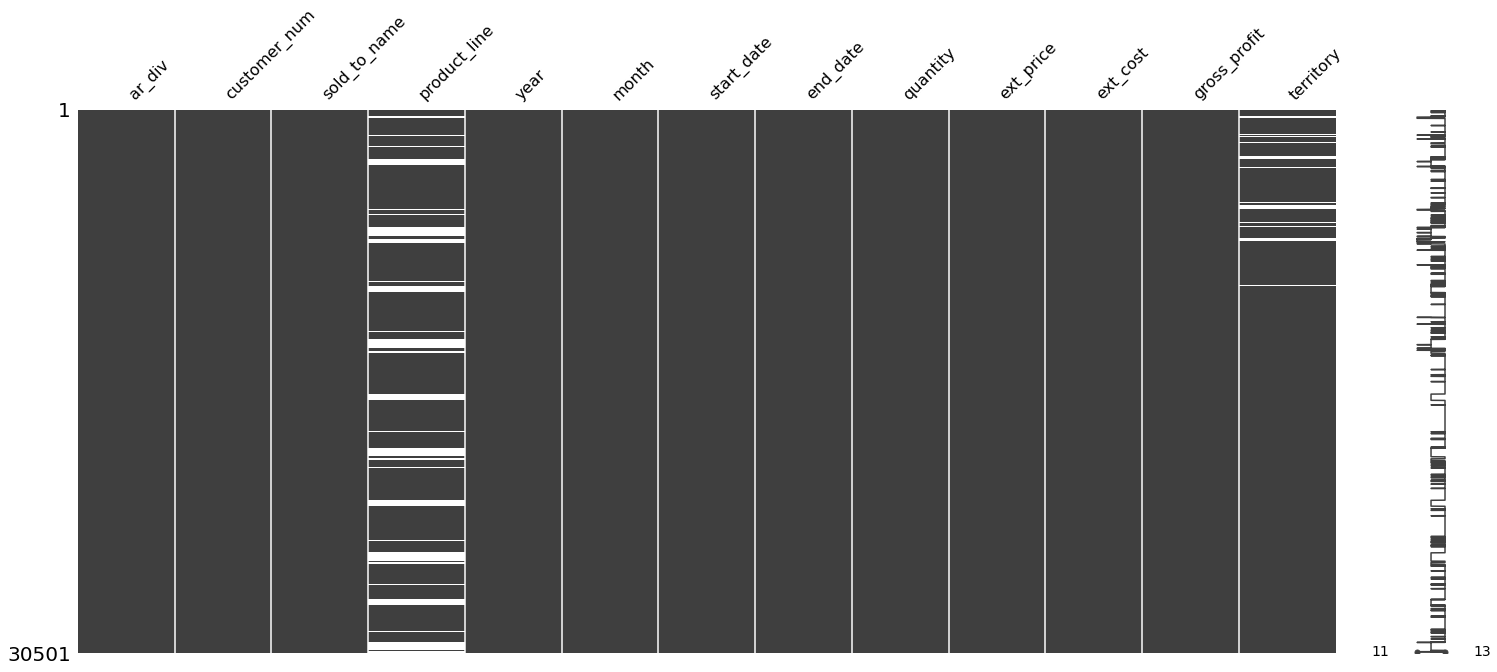

In [10]:
# check for missing values
mn.matrix(data);

In [11]:
data['product_line'].value_counts(dropna=False)

DCDF    10003
NaN      5424
PFBI     3352
DCDW     2970
FBSF     2721
KSNA     1627
DCDN     1542
LWF      1451
CRV      1246
PFCR      144
ICRV       21
Name: product_line, dtype: int64

In [12]:
# drop CRV and ICRV, irrelevant data
data = data[data['product_line'].isin(['CRV', 'ICRV']) == False]

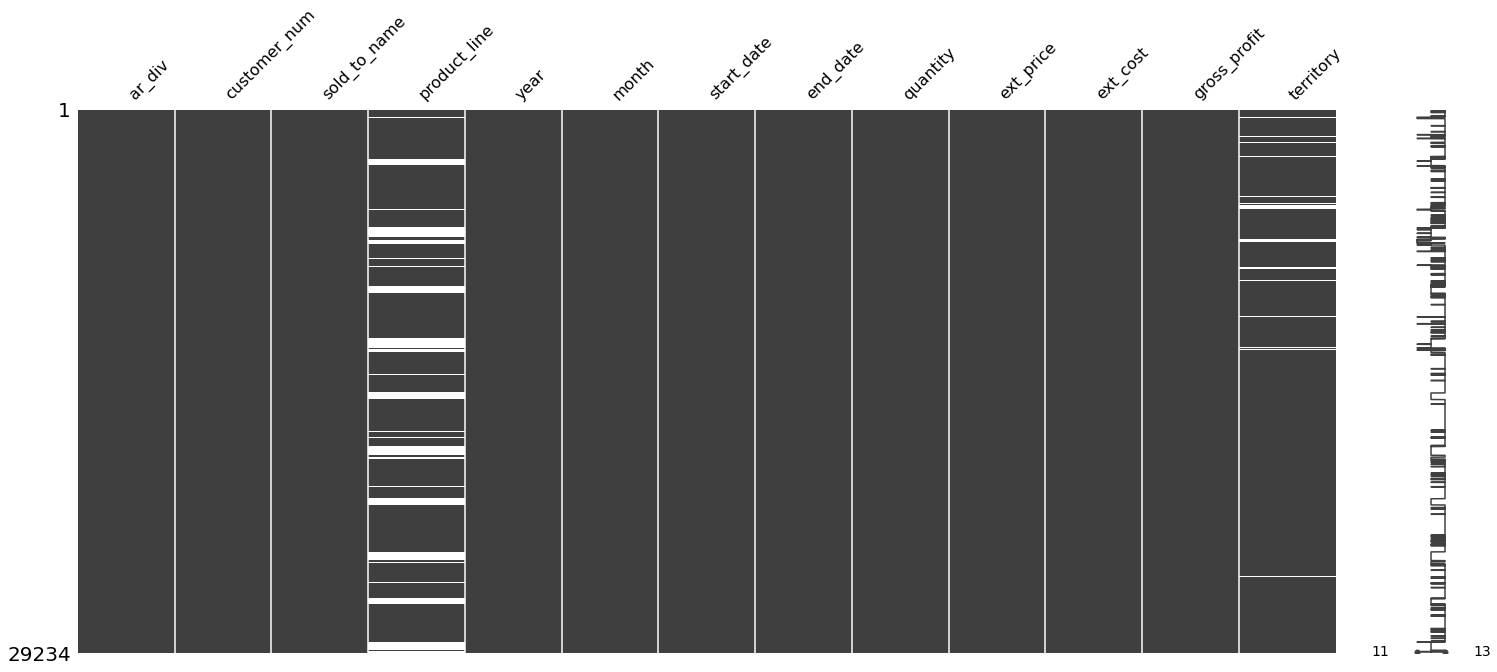

In [13]:
mn.matrix(data);

In [14]:
# remove the commas from numbers
data['quantity'] = data['quantity'].str.replace(',', '', regex=True)
data['ext_price'] = data['ext_price'].str.replace(',', '', regex=True)
data['ext_cost'] = data['ext_cost'].str.replace(',', '', regex=True)
data['gross_profit'] = data['gross_profit'].str.replace(',', '', regex=True)

# convert strings to floats
data['quantity'] = data['quantity'].astype(float)
data['ext_price'] = data['ext_price'].astype(float)
data['ext_cost'] = data['ext_cost'].astype(float)
data['gross_profit'] = data['gross_profit'].astype(float)

# Import Products Data to Use Territory and Store Names

In [15]:
products = pd.read_csv('../data/raw_data/products_combined.csv', compression='zip')

In [16]:
products.head(1)

,territory,ar_div,customer_num,sold_to_name,item_num,item_description,item_type,unit_of_measure,weight,standard_price,quantity,price,year,month
0,EB,0,1000026,Monterey Foods Market,039675777771,Have'a Corn Chips,CHIPS,EACH,4 oz,1.9,48.0,76.8,2017,1


In [17]:
# create a dataframe of territory and store names
stores = products[['territory', 'sold_to_name']]
stores.head()

,territory,sold_to_name
0,EB,Monterey Foods Market
1,EB,Monterey Foods Market
2,EB,Monterey Foods Market
3,EB,Monterey Foods Market
4,EB,Monterey Foods Market


In [18]:
# remove duplicates
stores.drop_duplicates(inplace=True)

# convert dataframe into a dictionary
stores = stores.to_dict(orient='records')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# Fixing Territories

In [19]:
# instantiate empty dictionary
territories = {}

# restructure the stores dictionary
for territory in stores:
    territories[territory['sold_to_name']] = territory['territory']

In [20]:
# map these territories based on the store name,
# since this dictionary does have all the stores, NaN's will be created (even if the territory is already there)
# fill NaN's with the territory data that was already there
data['territory'] = data['sold_to_name'].map(territories).fillna(data['territory'])

In [21]:
data['territory'].value_counts(dropna=False)

MR     9012
SN     6675
PN     3966
SF     3314
EB     1856
MN     1779
NP     1237
WR      471
TR      422
NaN     371
UK       57
ZZ       36
SAC      34
X         4
Name: territory, dtype: int64

There are still more missing territories. The Store ID/Territory dictionary and the products dataframe that were imported were not enough. More work will be need to be done.

In [22]:
data[data['territory'].isna()]

,ar_div,customer_num,sold_to_name,product_line,year,month,start_date,end_date,quantity,ext_price,ext_cost,gross_profit,territory
339,00,001000625,Gazzali's,KSNA,2017,1,1/1/2017,12/31/2017,740.0,1844.40,1520.39,324.01,NaN
340,00,001000625,Gazzali's,KSNA,2017,2,1/1/2017,12/31/2017,224.0,582.98,443.38,139.60,NaN
341,00,001000625,Gazzali's,KSNA,2017,3,1/1/2017,12/31/2017,287.0,637.11,579.78,57.33,NaN
342,00,001000625,Gazzali's,KSNA,2017,5,1/1/2017,12/31/2017,480.0,1083.72,971.32,112.40,NaN
343,00,001000625,Gazzali's,KSNA,2017,7,1/1/2017,12/31/2017,438.0,1225.97,917.57,308.40,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5973,11,111002052,Walmart- Ukiah,NaN,2018,1,1/1/2018,12/31/2018,4.0,1661.69,0.00,1661.69,NaN
5323,00,001000512,Glen Ellen #12 (Willows),PFBI,2019,11,1/1/2019,12/31/2019,68.0,229.20,179.52,49.68,NaN
728,00,001001379,Pelican Plaza #2,PFBI,2021,12,1/1/2021,12/31/2021,192.0,577.92,454.66,123.26,NaN
4377,00,001007956,"Safeway #7956-Marlow, S.Rosa",NaN,2021,10,1/1/2021,12/31/2021,1.0,257.10,0.00,257.10,NaN


### Filling Missing Territories by Hand

In [23]:
missing_territories = {
    '76 Stn - Ignacio': 'MR',
    "Andronico's #7-San Anselmo": 'MR',
    'Bartletts General Store': 'SN',
    "Bill's Liquor": 'SN',
    'Bodega Ave. Mkt.': 'SN',
    'Bodega Country Store': 'SN',
    'Bohemian Club-Monte Rio': 'SN',
    'Brunos Foods': 'UK',
    'Circle K - 76 Stn (Ignacio)': 'MR',
    "Dan's Market": 'MR',
    "Denhard's Market": 'SF',
    'Famous Deli  San Rafael': 'MR',
    'Fast & Easy - Forestville': 'SN',
    'Fast & Easy - San Rafael': 'MR',
    'First Community Bank': 'SN',
    'Food 24 Hr. Mkt.-Fulton&Divis.': 'SF',
    'Foods Etc.': 'UK',
    "Gazzali's": 'EB',
    'Glen Ellen #12 (Willows)': 'SN',
    'Haight & Filmore Foods': 'SF',
    'Jules Thin Crust Oakland': 'EB',
    'Key Food Mart': 'SF',
    "Lucchessi's Deli": 'SN',
    'Lucky - Bicentennial': 'SN',
    'Mollie Stone-San Francisco': 'SF',
    "Oliver's Market Business Offic": 'SN',
    "Oliver's Warehouse": 'SN',
    'Pelican Plaza #2': 'MN',
    "Perry's-Inverness": 'MR',
    'Poppy Bank': 'SN',
    'Purity Store': 'UK',
    'Rancho Mendoza - Piner Rd': 'SN',
    'Rancho Mendoza - Sebastopol Rd': 'SN',
    'Rialto Cinemas Elmwood': 'SN',
    'Riviera Market': 'UK',
    'Safeway #1723-San Anselmo': 'MR',
    'Safeway #2828-Ignacio': 'MR',
    'Safeway #2828-Novato': 'MR',
    'Safeway #7956-Marlow, S.Rosa': 'SN',
    'Safeway #984-Clearlake': 'UK',
    'Sausalito Market': 'MR',
    'Seven Eleven-Geary St., S.F.': 'SF',
    'Seven Eleven-Miller Ave,M.V.': 'MR',
    'Superette Market': 'SF',
    'Tomales Bay Foods, Inc.': 'MR',
    'United Liquors-Larkspur': 'MR',
    'Wine & Foods Spoken Here': 'SN',
    "Bruno's Smart Choice - C & K": 'UK',
    'CVS #10188-Haight St.': 'SF',
    'CVS #345 - Cloverdale': 'UK',
    'CVS #4675 - SF': 'SF',
    'CVS #9822 - Ukiah': 'UK',
    'CVS #9943 - Lakeport': 'UK',
    'CVS #9948 - Yulupa Ave.': 'SN',
    'Dale Cox - Donations': 'ZZ',
    'Dale Cox - PF Food Bank': 'ZZ',
    'E.G. Ayers Distributing': 'TR',
    'Food Maxx-Ukiah': 'UK',
    'Glen Ellen Village/Nugget #18': 'SN',
    'Hem Distributing': 'TR',
    'Jerry Curiel': 'TR',
    'Kmart-Lakeport': 'UK',
    'Longs Drug-Healdsburg': 'SN',
    'Longs Drugs #480-E. Wash.,Pet.': 'SN',
    'Lucky - Ukiah': 'UK',
    "Raley's-Ukiah": 'UK',
    "Ray's Food Place-Cloverdale": 'UK',
    'Safeway #1507-Market St., S.F.': 'SF',
    'Safeway #1583-Ukiah': 'UK',
    'Safeway #2452 -Irving St, SF': 'SF',
    'Safeway #785-LaPlaya, S.F.': 'SF',
    'Safeway #965-Willits': 'UK',
    'Safeway #978-Ft.Bragg': 'UK',
    'Safeway #983-Lakeport': 'UK',
    'Safeway#2646-7th Ave., S.F.': 'SF',
    'Smart & Final - S.F.': 'SF',
    "Veteran's Canteen #662": 'SF',
    "Walgreen's-Clement St.": 'SF',
    "Walgreen's-Geary St.": 'SF',
    "Walgreen's-Point Lobos": 'SF',
    'Walgreens  Gough': 'SF',
    'Walmart- Clearlake': 'UK',
    'Walmart- Ukiah': 'UK',
    'ZSeven Eleven-Sausalito': 'MR'  
}

In [24]:
# territories.update(missing_territories)

# map these missing territories based on the store name,
# since this dictionary does have all the stores, NaN's will be created (even if the territory is already there)
# fill NaN's with the territory data that was already there
data['territory'] = data['sold_to_name'].map(missing_territories).fillna(data['territory'])

In [25]:
data = data[data['territory'].isin(['TR', 'SAC', 'UK', 'WR', 'ZZ', 'X']) == False]

In [26]:
data[data['territory'].isna()]

,ar_div,customer_num,sold_to_name,product_line,year,month,start_date,end_date,quantity,ext_price,ext_cost,gross_profit,territory


In [27]:
data = data[data['gross_profit'] > 0]

# Fixing Missing Product Lines

In [28]:
data['product_line'].value_counts(dropna=False)

DCDF    9688
NaN     4651
PFBI    3212
DCDW    2835
FBSF    2609
KSNA    1531
DCDN    1490
LWF     1417
PFCR     124
Name: product_line, dtype: int64

In [29]:
data[data['product_line'].isna()]

,ar_div,customer_num,sold_to_name,product_line,year,month,start_date,end_date,quantity,ext_price,ext_cost,gross_profit,territory
1249,00,001000191,Woodlands Market,NaN,2017,12,1/1/2017,12/31/2017,1.0,399.60,0.0,399.60,MR
1475,00,001000108,Scotty's Market,NaN,2017,1,1/1/2017,12/31/2017,5.0,819.14,0.0,819.14,MR
1476,00,001000108,Scotty's Market,NaN,2017,2,1/1/2017,12/31/2017,4.0,905.59,0.0,905.59,MR
1477,00,001000108,Scotty's Market,NaN,2017,3,1/1/2017,12/31/2017,6.0,948.67,0.0,948.67,MR
1478,00,001000108,Scotty's Market,NaN,2017,4,1/1/2017,12/31/2017,4.0,1191.29,0.0,1191.29,MR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,11,111000775,Lucky - Bicentennial,NaN,2021,8,1/1/2021,12/31/2021,0.0,1269.27,0.0,1269.27,SN
4919,11,111000775,Lucky - Bicentennial,NaN,2021,9,1/1/2021,12/31/2021,1.0,818.06,0.0,818.06,SN
4920,11,111000775,Lucky - Bicentennial,NaN,2021,10,1/1/2021,12/31/2021,1.0,1462.96,0.0,1462.96,SN
4921,11,111000775,Lucky - Bicentennial,NaN,2021,11,1/1/2021,12/31/2021,1.0,1986.46,0.0,1986.46,SN


Removing this data from the dataset, fixing it, and then merging it back

In [30]:
# create dataframe of null product_lines
null_pl = data[data['product_line'].isna()]

# remove null product lines
data = data[data['product_line'].isna() == False]

In [31]:
# all these have a cost of 0
null_pl['ext_cost'].value_counts()

0.0    4651
Name: ext_cost, dtype: int64

After talking with an employee of DCD, all of these product lines should be PF. The ext_price and gross_profit should not be the same, and the ext_cost should not be 0.

* The ext_price will remain the same.
* The ext_cost will be computed to be 80% of the ext_cost.
* The gross_profit will be computed to 20% of the ext_price.

These numbers were determined because PF items have a fixed profit margin of 20%.

In [32]:
null_pl.head()

,ar_div,customer_num,sold_to_name,product_line,year,month,start_date,end_date,quantity,ext_price,ext_cost,gross_profit,territory
1249,00,001000191,Woodlands Market,NaN,2017,12,1/1/2017,12/31/2017,1.0,399.60,0.0,399.60,MR
1475,00,001000108,Scotty's Market,NaN,2017,1,1/1/2017,12/31/2017,5.0,819.14,0.0,819.14,MR
1476,00,001000108,Scotty's Market,NaN,2017,2,1/1/2017,12/31/2017,4.0,905.59,0.0,905.59,MR
1477,00,001000108,Scotty's Market,NaN,2017,3,1/1/2017,12/31/2017,6.0,948.67,0.0,948.67,MR
1478,00,001000108,Scotty's Market,NaN,2017,4,1/1/2017,12/31/2017,4.0,1191.29,0.0,1191.29,MR


In [33]:
# fixing the columns mentioned above
null_pl['ext_cost'] = null_pl['ext_price'] * .8
null_pl['gross_profit'] = null_pl['ext_price'] * .2
null_pl['product_line'].fillna('PFBI', inplace=True)

null_pl.head(2)

,ar_div,customer_num,sold_to_name,product_line,year,month,start_date,end_date,quantity,ext_price,ext_cost,gross_profit,territory
1249,00,001000191,Woodlands Market,PFBI,2017,12,1/1/2017,12/31/2017,1.0,399.60,319.680,79.920,MR
1475,00,001000108,Scotty's Market,PFBI,2017,1,1/1/2017,12/31/2017,5.0,819.14,655.312,163.828,MR


Now that this data has been fixed, it will be concatenated with the main dataframe

In [34]:
data = pd.concat([data, null_pl])
data.head()

,ar_div,customer_num,sold_to_name,product_line,year,month,start_date,end_date,quantity,ext_price,ext_cost,gross_profit,territory
1,00,001000438,Farmer Joe's - Fruitvale Ave.,DCDF,2017,1,1/1/2017,12/31/2017,1941.0,6976.10,4969.73,2006.37,EB
2,00,001000438,Farmer Joe's - Fruitvale Ave.,DCDF,2017,2,1/1/2017,12/31/2017,1410.0,5720.97,3961.72,1759.26,EB
3,00,001000438,Farmer Joe's - Fruitvale Ave.,DCDF,2017,3,1/1/2017,12/31/2017,1481.0,6235.74,4338.17,1897.56,EB
4,00,001000438,Farmer Joe's - Fruitvale Ave.,DCDF,2017,4,1/1/2017,12/31/2017,1468.0,5916.20,4073.85,1842.35,EB
5,00,001000438,Farmer Joe's - Fruitvale Ave.,DCDF,2017,5,1/1/2017,12/31/2017,1855.0,7775.81,5380.72,2395.09,EB


simplifying product lines

In [35]:
product_lines = {
    'DCDF': 'DCD',
    'PFBI': 'PF',    
    'DCDW': 'DCD',    
    'FBSF': 'DCD',    
    'KSNA': 'DCD',    
    'DCDN': 'DCD',    
    'LWF': 'DCD',     
    'PFCR': 'PF',     
}

data['product_line'] = data['product_line'].map(product_lines)

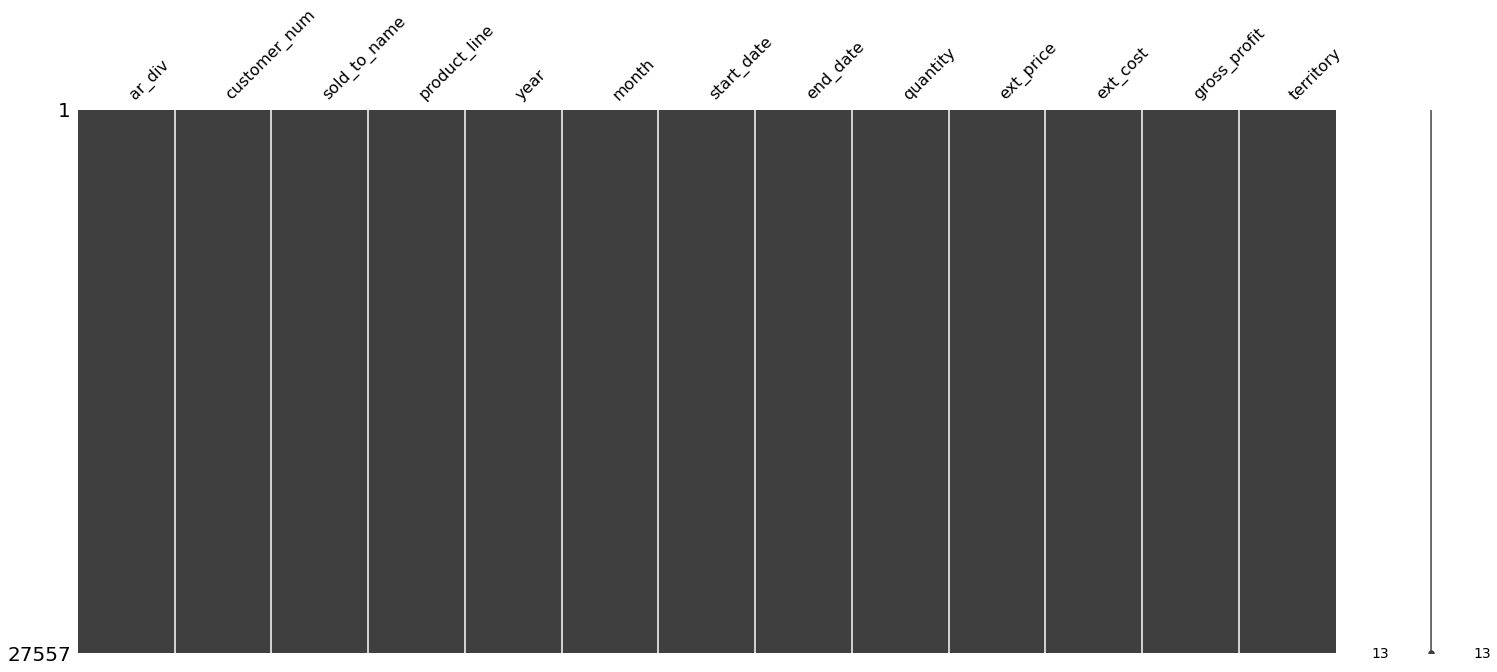

In [36]:
# checking for missing data
mn.matrix(data);

In [37]:
# combine year and month columns and create a date column
data['date'] = data['year'].astype(str) + '-' + data['month'].astype(str)

# set the date to a datetime, set it as index, and sort the dataframe
data['date'] = pd.to_datetime(data['date'])
data.set_index(data['date'], inplace=True)
data.sort_index(inplace=True)

In [38]:
data.head()

,ar_div,customer_num,sold_to_name,product_line,year,month,start_date,end_date,quantity,ext_price,ext_cost,gross_profit,territory,date
date,,,,,,,,,,,,,,
2017-01-01,00,001000438,Farmer Joe's - Fruitvale Ave.,DCD,2017,1,1/1/2017,12/31/2017,1941.0,6976.10,4969.73,2006.37,EB,2017-01-01
2017-01-01,00,001014136,"Seven Eleven-Redwood Hwy,M.V.",DCD,2017,1,1/1/2017,12/31/2017,120.0,186.00,148.08,37.92,MR,2017-01-01
2017-01-01,00,001008110,Nugget - #15 Corte Madera,DCD,2017,1,1/1/2017,12/31/2017,144.0,335.82,302.97,32.85,MR,2017-01-01
2017-01-01,00,001008110,Nugget - #15 Corte Madera,DCD,2017,1,1/1/2017,12/31/2017,57.0,179.50,134.09,45.41,MR,2017-01-01
2017-01-01,00,001008111,Nugget - #16 Novato,DCD,2017,1,1/1/2017,12/31/2017,165.0,379.33,325.57,53.76,MR,2017-01-01


# Save the Clean Data

In [39]:
data.to_csv('../data/clean_data/profits_clean.csv', compression='zip', index=False)

In [40]:
df_tableau = data[['sold_to_name', 'product_line', 'quantity', 'gross_profit', 'territory', 'date']]

In [41]:
df_tableau.to_csv('C:/Users/ncox0/DSI/misc/profits_tableau.csv', index=False)